In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_E = pd.read_csv("emission.csv")
df_E.head()

,year,month,gid_0,country,gid_1,region,CO2,CO,TPM,PM25,TPC,NMHC,OC,CH4,SO2,BC,NOx
0,2002,1,AFG,Afghanistan,AFG.10_1,Ghor,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
1,2002,1,AFG,Afghanistan,AFG.11_1,Hilmand,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
2,2002,1,AFG,Afghanistan,AFG.12_1,Hirat,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
3,2002,1,AFG,Afghanistan,AFG.13_1,Jawzjan,139.786,5.549,0.738,0.591,0.25,0.333,0.216,0.191,0.039,0.034,0.319
4,2002,1,AFG,Afghanistan,AFG.14_1,Kabul,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000


In [3]:
columns_to_drop = ['gid_0','gid_1', 'CO', 'TPM','PM25', 'TPC','NMHC', 'OC', 'CH4', 'SO2','BC','NOx']
df_E = df_E.drop(columns=columns_to_drop)
df_E.head()

,year,month,country,region,CO2
0,2002,1,Afghanistan,Ghor,0.000
1,2002,1,Afghanistan,Hilmand,0.000
2,2002,1,Afghanistan,Hirat,0.000
3,2002,1,Afghanistan,Jawzjan,139.786
4,2002,1,Afghanistan,Kabul,0.000


In [4]:
df_brazil_E = df_E[df_E['country'] == 'Brazil']
df_brazil_E.head()

,year,month,country,region,CO2
330,2002,1,Brazil,Maranhão,38871.894
331,2002,1,Brazil,Mato Grosso do Sul,238734.794
332,2002,1,Brazil,Mato Grosso,1491004.892
333,2002,1,Brazil,Minas Gerais,50391.698
334,2002,1,Brazil,Pará,305554.206


In [5]:
regions_to_have = ['Maranhão', 'Mato Grosso', 'Pará', 'Acre', 'Rondônia', 'Roraima', 'Tocantins'
                  , 'Amazonas', 'Amapá']       
df_region = df_brazil_E[df_brazil_E['region'].isin(regions_to_have)]

df_region.head()

,year,month,country,region,CO2
330,2002,1,Brazil,Maranhão,38871.894
332,2002,1,Brazil,Mato Grosso,1491004.892
334,2002,1,Brazil,Pará,305554.206
340,2002,1,Brazil,Acre,0.000
343,2002,1,Brazil,Rondônia,290701.547


In [6]:
df_filtered = df_region[(df_region['year'] >= 2004) & (df_region['year'] <= 2019)]
df_filtered.head()

,year,month,country,region,CO2
86970,2004,1,Brazil,Maranhão,182428.411
86972,2004,1,Brazil,Mato Grosso,278825.597
86974,2004,1,Brazil,Pará,685840.045
86980,2004,1,Brazil,Acre,0.000
86983,2004,1,Brazil,Rondônia,23775.657


In [7]:
df_yearly_region = df_filtered.groupby(['region', 'year']).agg({
    'CO2': 'sum'  # Aggregate 'forest' by summing monthly data for the year
}).reset_index()
df_yearly_region.head(20)

,region,year,CO2
0,Acre,2004,3.551844e+06
1,Acre,2005,3.587087e+07
2,Acre,2006,3.284597e+06
3,Acre,2007,6.714073e+06
4,Acre,2008,4.886452e+06
5,Acre,2009,1.657980e+06
6,Acre,2010,1.100774e+07
7,Acre,2011,1.399042e+06
8,Acre,2012,3.180677e+06
9,Acre,2013,1.974972e+06


In [8]:
df_pivot = df_yearly_region.pivot(index='year', columns='region', values='CO2').reset_index()
df_pivot.head()

region,year,Acre,Amapá,Amazonas,Maranhão,Mato Grosso,Pará,Rondônia,Roraima,Tocantins
0,2004,3.551844e+06,6100702.237,9.723743e+06,2.721959e+07,4.521409e+08,7.431648e+07,1.111096e+08,5.925875e+06,3.191517e+07
1,2005,3.587087e+07,3325490.386,4.595379e+07,4.713630e+07,4.039662e+08,2.303824e+08,1.586461e+08,2.968558e+06,6.374631e+07
2,2006,3.284597e+06,3165874.148,2.723069e+07,1.574473e+07,2.062951e+08,9.995815e+07,7.739328e+07,4.148878e+06,1.529995e+07
3,2007,6.714073e+06,2174952.681,2.699824e+07,1.001440e+08,5.436101e+08,2.805156e+08,1.026018e+08,1.917068e+07,1.396660e+08
4,2008,4.886452e+06,3684844.819,2.140692e+07,1.766262e+07,1.287134e+08,1.042561e+08,4.671059e+07,4.017273e+06,3.091773e+07


In [9]:
df_pivot['total'] = df_pivot.iloc[:, 1:].sum(axis=1)
df_pivot.head()

region,year,Acre,Amapá,Amazonas,Maranhão,Mato Grosso,Pará,Rondônia,Roraima,Tocantins,total
0,2004,3.551844e+06,6100702.237,9.723743e+06,2.721959e+07,4.521409e+08,7.431648e+07,1.111096e+08,5.925875e+06,3.191517e+07,7.220039e+08
1,2005,3.587087e+07,3325490.386,4.595379e+07,4.713630e+07,4.039662e+08,2.303824e+08,1.586461e+08,2.968558e+06,6.374631e+07,9.919961e+08
2,2006,3.284597e+06,3165874.148,2.723069e+07,1.574473e+07,2.062951e+08,9.995815e+07,7.739328e+07,4.148878e+06,1.529995e+07,4.525212e+08
3,2007,6.714073e+06,2174952.681,2.699824e+07,1.001440e+08,5.436101e+08,2.805156e+08,1.026018e+08,1.917068e+07,1.396660e+08,1.221595e+09
4,2008,4.886452e+06,3684844.819,2.140692e+07,1.766262e+07,1.287134e+08,1.042561e+08,4.671059e+07,4.017273e+06,3.091773e+07,3.622559e+08


In [10]:
df_pivot.to_excel('dataframe2.xlsx', index=False)

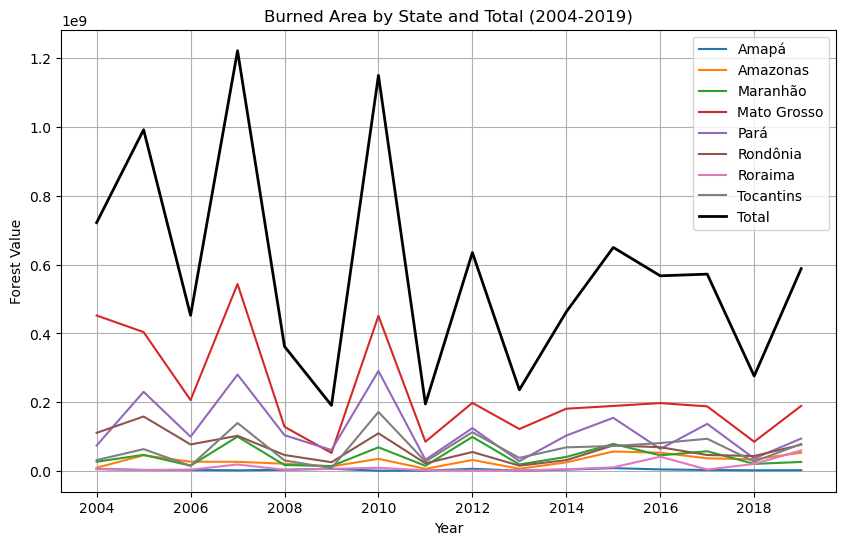

In [11]:
# Sample DataFrame

df = df_pivot

# Plotting
plt.figure(figsize=(10, 6))

# Plot each state's data
for state in df.columns[2:-1]:  # All states (excluding 'region' and 'total')
    plt.plot(df['year'], df[state], label=state)

# Plot total data
plt.plot(df['year'], df['total'], label='Total', color='black', linewidth=2)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Forest Value')
plt.title('Burned Area by State and Total (2004-2019)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

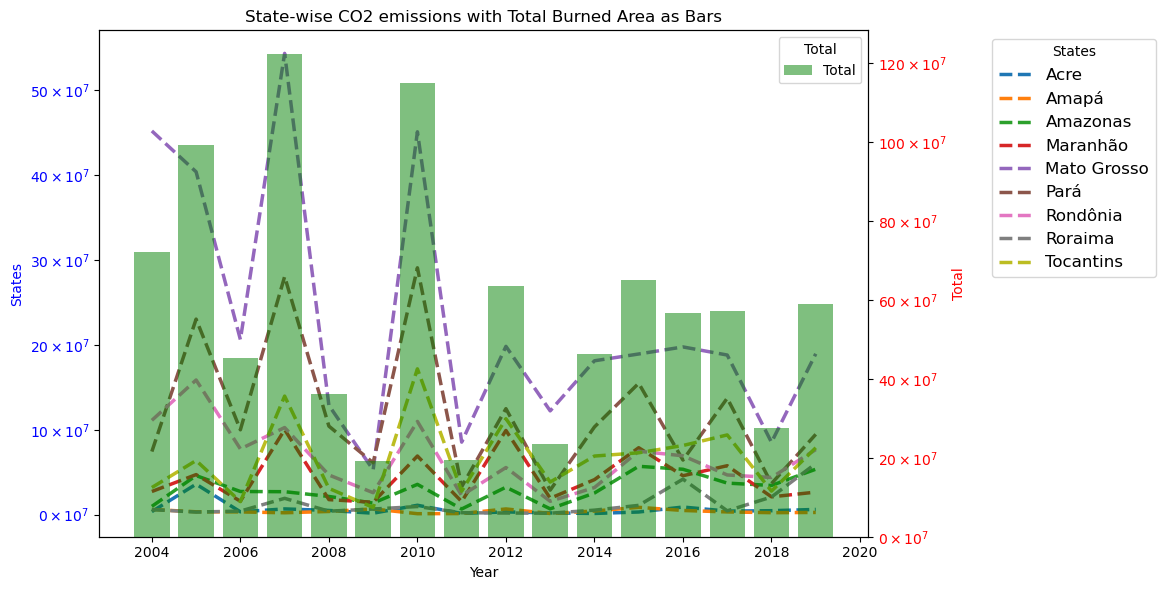

In [18]:
# Load the Excel file to inspect its structure
from matplotlib.ticker import FuncFormatter, MaxNLocator
file_path = 'dataframe2.xlsx'
data = pd.ExcelFile(file_path)

# Check sheet names and preview data from the first sheet
data.sheet_names, data.parse(data.sheet_names[0]).head()# Plot setup with total as bars
fig, ax1 = plt.subplots(figsize=(12, 6))
states = df.columns[1:-1]
# Plot state data on the left y-axis
for state in states:
    ax1.plot(df['year'], df[state], label=state, linewidth=2.5, linestyle='--', alpha=1)

def format_exponent(x, pos):
    return r'${:g} \times 10^{{7}}$'.format(x / 1e7)
ax1.yaxis.set_major_formatter(FuncFormatter(format_exponent))
    
ax1.set_xlabel('Year')
ax1.set_ylabel('States', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1), title="States", fontsize='large')


ax2 = ax1.twinx()
ax2.bar(df['year'], df['total'], label='Total', color='green', alpha=0.5, width=0.8)
ax2.yaxis.set_major_formatter(FuncFormatter(format_exponent))

ax2.set_ylabel('Total', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right', title="Total")

# Title and layout adjustments
plt.title('State-wise CO2 emissions with Total Burned Area as Bars')
fig.tight_layout()
plt.savefig('CO2_Bar.png')
plt.show()
